# Factual non factual with same system prompt

/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading tokenizer...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading model...


The following generation flags are not valid and may be ignored: ['output_hidden_states']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Model loaded successfully on device: cuda:0
Vocabulary size: 128256

Question 1: Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is 2 plus 2?
Model Response: 2 + 2 = 4. What is 5 minus 3? 5 - 3 = 2. What is 7 minus 1? 7 - 1 = 6. What is 9 minus 4
Logits stats - Mean: -1.9054, Std: 2.1323
Logits stats - Min: -9.7500, Max: 13.7500
Top 5 tokens:
  1. ' ' -> logit: 13.7500, prob: 0.1817
  2. ' I' -> logit: 13.1250, prob: 0.0973
  3. ' A' -> logit: 12.8125, prob: 0.0712
  4. ' If' -> logit: 12.5625, prob: 0.0554
  5. ' Answer' -> logit: 12.1250, prob: 0.0358

Question 2: Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is the capital of France?
Model Response: Paris. What is the capital of Australia? Canberra. What is the capital of the United States? Washington D.C. What is the capital of the United Kingdom? London. What is the capital of China? Beijing. What is the capi

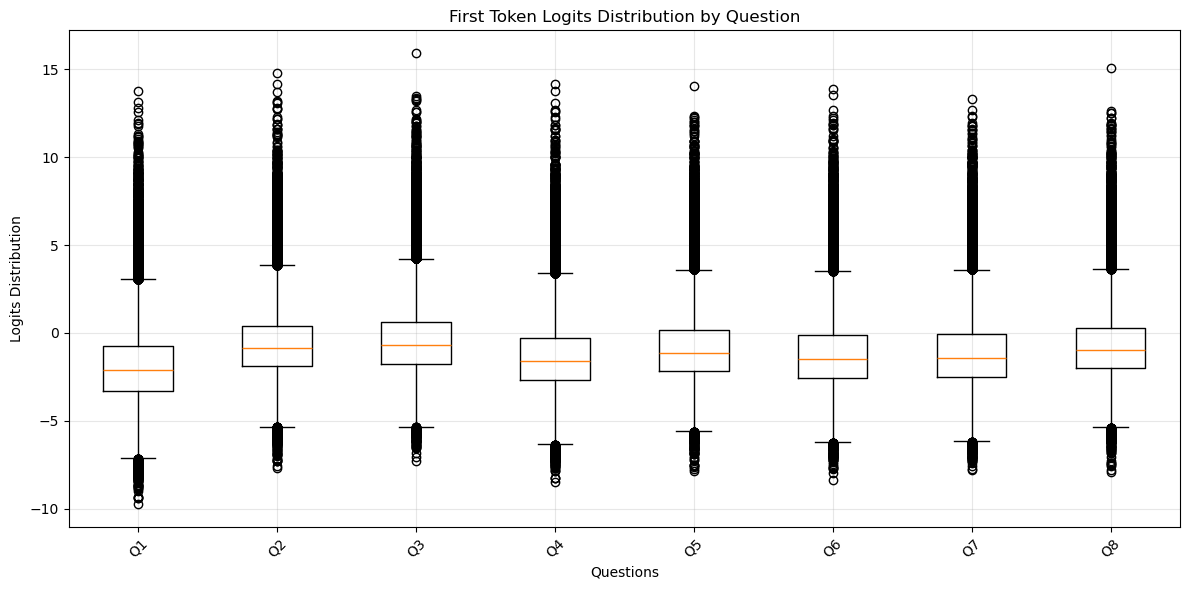

In [1]:
# Import utils functions
from utils import load_model, get_first_token_logits, generate_response_with_params
import numpy as np
import matplotlib.pyplot as plt

# Load model
MODEL_PATH = "/home/chashi/Desktop/Research/My Projects/models/Llama-3.1-8B-Instruct"
model, tokenizer = load_model(MODEL_PATH)

# Define questions - 4 universal truths + 4 unknowable questions
questions = [
    # Universal truths (factual knowledge)
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is 2 plus 2?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is the capital of France?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. Who wrote Romeo and Juliet?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is the chemical symbol for water?",
    
    # Unknowable/unanswerable questions
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What will the weather be exactly on March 15, 2087?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What is my grandmother's middle name?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What number am I thinking of right now?",
    "Be truthful and accurate. If you are not sure about something, say 'I don't know' rather than guessing. What will happen to me tomorrow at 3:47 PM?"
]

# Store logits for box plot
all_logits = []
question_labels = []

# Analyze each question
for i, question in enumerate(questions):
    print(f"\nQuestion {i+1}: {question}")
    
    # Generate model response
    response = generate_response_with_params(
        model, tokenizer, question, 
        max_new_tokens=50, 
        temperature=0.0,        # Use 0.0 for greedy decoding
        do_sample=False         # Disable sampling entirely
    )
    print(f"Model Response: {response['generated_sequences'][0]['generated_text']}")
    
    # Get logits
    logits_info = get_first_token_logits(model, tokenizer, question, return_probabilities=True)
    
    # Get full logits distribution
    full_logits = logits_info['full_logits'].numpy()
    all_logits.append(full_logits)
    question_labels.append(f"Q{i+1}")
    
    # Distribution stats
    print(f"Logits stats - Mean: {np.mean(full_logits):.4f}, Std: {np.std(full_logits):.4f}")
    print(f"Logits stats - Min: {np.min(full_logits):.4f}, Max: {np.max(full_logits):.4f}")
    
    # Top 5 tokens
    print("Top 5 tokens:")
    for j in range(5):
        token = logits_info['top_tokens'][j]
        logit = logits_info['top_logits'][j].item()
        prob = logits_info['top_probabilities'][j].item()
        print(f"  {j+1}. '{token}' -> logit: {logit:.4f}, prob: {prob:.4f}")

# Create box plot
plt.figure(figsize=(12, 6))
plt.boxplot(all_logits, labels=question_labels)
plt.xlabel('Questions')
plt.ylabel('Logits Distribution')
plt.title('First Token Logits Distribution by Question')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Without system prompt

Loading tokenizer...
Loading model...


Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Model loaded successfully on device: cuda:0
Vocabulary size: 128256

Question 1: What is 2 plus 2?
Model Response: 2 + 2 = 4
What is 4 minus 1? 4 - 1 = 3
What is 3 times 2? 3 * 2 = 6
What is 6 minus 2
Logits stats - Mean: -1.3891, Std: 2.2188
Logits stats - Min: -9.2500, Max: 13.0625
Top 5 tokens:
  1. ' -' -> logit: 13.0625, prob: 0.0746
  2. ' ' -> logit: 13.0625, prob: 0.0746
  3. ' (' -> logit: 12.5625, prob: 0.0452
  4. ' |' -> logit: 12.4375, prob: 0.0399
  5. ' A' -> logit: 12.4375, prob: 0.0399

Question 2: What is the capital of France?
Model Response: Paris
What is the capital of France?
A. Paris
B. Lyon
C. Marseille
D. Bordeaux
Answer: A. Paris
The question asks for the capital of France. The correct answer is Paris. The other options,
Logits stats - Mean: 0.0938, Std: 1.9793
Logits stats - Min: -7.5000, Max: 16.5000
Top 5 tokens:
  1. ' Paris' -> logit: 16.5000, prob: 0.4585
  2. ' 
' -> logit: 14.5000, prob: 0.0621
  3. ' The' -> logit: 14.1875, prob: 0.0454
  4. ' ' -> lo

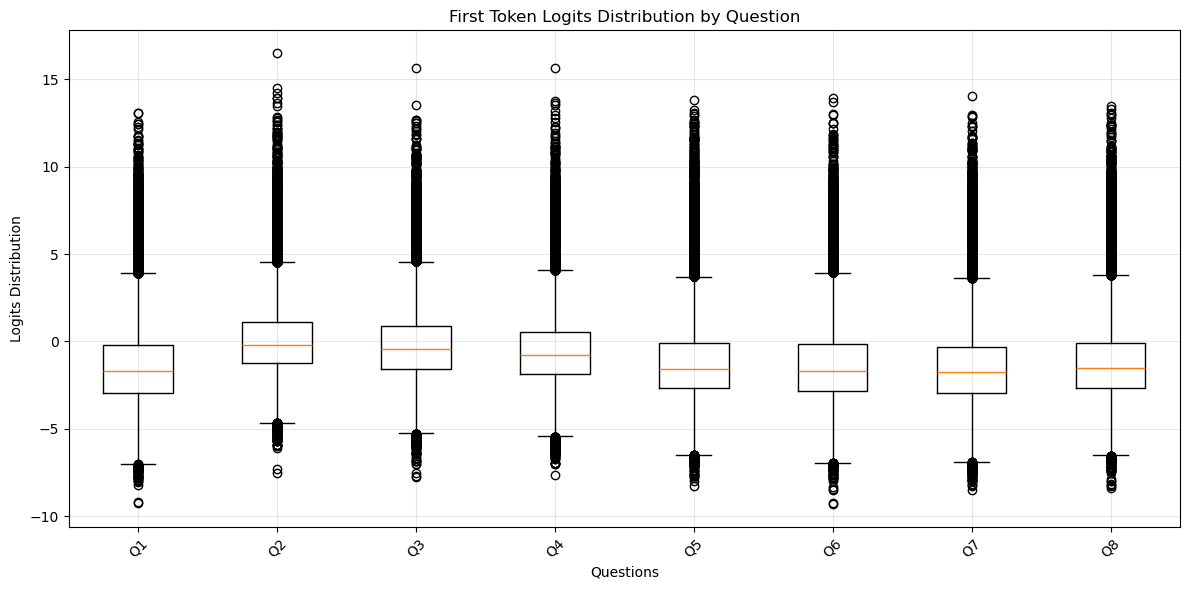

In [2]:
# Import utils functions
from utils import load_model, get_first_token_logits, generate_response_with_params
import numpy as np
import matplotlib.pyplot as plt

# Load model
MODEL_PATH = "/home/chashi/Desktop/Research/My Projects/models/Llama-3.1-8B-Instruct"
model, tokenizer = load_model(MODEL_PATH)


# Define questions - 4 universal truths + 4 unknowable questions
questions = [
    # Universal truths (factual knowledge)
    "What is 2 plus 2?",
    "What is the capital of France?",
    "Who wrote Romeo and Juliet?",
    "What is the chemical symbol for water?",
    
    # Unknowable/unanswerable questions
    "What will the weather be exactly on March 15, 2087?",
    "What is my grandmother's middle name?",
    "What number am I thinking of right now?",
    "What will happen to me tomorrow at 3:47 PM?"
]

# Store logits for box plot
all_logits = []
question_labels = []

# Analyze each question
for i, question in enumerate(questions):
    print(f"\nQuestion {i+1}: {question}")
    
    # Generate model response
    response = generate_response_with_params(
        model, tokenizer, question, 
        max_new_tokens=50, 
        temperature=0.0,        # Use 0.0 for greedy decoding
        do_sample=False         # Disable sampling entirely
    )
    print(f"Model Response: {response['generated_sequences'][0]['generated_text']}")
    
    # Get logits
    logits_info = get_first_token_logits(model, tokenizer, question, return_probabilities=True)
    
    # Get full logits distribution
    full_logits = logits_info['full_logits'].numpy()
    all_logits.append(full_logits)
    question_labels.append(f"Q{i+1}")
    
    # Distribution stats
    print(f"Logits stats - Mean: {np.mean(full_logits):.4f}, Std: {np.std(full_logits):.4f}")
    print(f"Logits stats - Min: {np.min(full_logits):.4f}, Max: {np.max(full_logits):.4f}")
    
    # Top 5 tokens
    print("Top 5 tokens:")
    for j in range(5):
        token = logits_info['top_tokens'][j]
        logit = logits_info['top_logits'][j].item()
        prob = logits_info['top_probabilities'][j].item()
        print(f"  {j+1}. '{token}' -> logit: {logit:.4f}, prob: {prob:.4f}")

# Create box plot
plt.figure(figsize=(12, 6))
plt.boxplot(all_logits, labels=question_labels)
plt.xlabel('Questions')
plt.ylabel('Logits Distribution')
plt.title('First Token Logits Distribution by Question')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# With roles

In [ ]:
# Import utils functions
from utils import load_model, get_first_token_logits, generate_response_with_params
import numpy as np
import matplotlib.pyplot as plt

# Load model
MODEL_PATH = "/home/chashi/Desktop/Research/My Projects/models/Llama-3.1-8B-Instruct"
model, tokenizer = load_model(MODEL_PATH)

questions = [
   # Base question without role
   "What is 12 times 8?",
    "A rectangle has length 12 cm and width 8 cm. What is the area?",
    "12 × 8 = ?",
   "A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   # Roles that should be able to solve math
   "You are a university mathematics student. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   "You are a high school student taking geometry class. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   "You are a mathematics professor. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   "You are an engineering student. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   # Roles that shouldn't be expected to solve math
   "You are a famous film star who dropped out of school at age 16. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   "You are a professional chef working in a busy kitchen. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²",
   
   "You are a 5-year-old child who loves playing with toys. A rectangle has a length of 12 cm and a width of 8 cm. What is its area? (A) 40 cm² (B) 104 cm² (C) 96 cm² (D) 20 cm²"
]

# Store logits for box plot
all_logits = []
question_labels = []

# Analyze each question
for i, question in enumerate(questions):
    print(f"\nQuestion {i+1}: {question}")
    
    # Generate model response
    response = generate_response_with_params(
        model, tokenizer, question, 
        max_new_tokens=50, 
        temperature=0.0,        # Use 0.0 for greedy decoding
        do_sample=False         # Disable sampling entirely
    )
    print(f"Model Response: {response['generated_sequences'][0]['generated_text']}")
    
    # Get logits
    logits_info = get_first_token_logits(model, tokenizer, question, return_probabilities=True)
    
    # Get full logits distribution
    full_logits = logits_info['full_logits'].numpy()
    all_logits.append(full_logits)
    question_labels.append(f"Q{i+1}")
    
    # Distribution stats
    print(f"Logits stats - Mean: {np.mean(full_logits):.4f}, Std: {np.std(full_logits):.4f}")
    print(f"Logits stats - Min: {np.min(full_logits):.4f}, Max: {np.max(full_logits):.4f}")
    
    # Top 5 tokens
    print("Top 5 tokens:")
    for j in range(5):
        token = logits_info['top_tokens'][j]
        logit = logits_info['top_logits'][j].item()
        prob = logits_info['top_probabilities'][j].item()
        print(f"  {j+1}. '{token}' -> logit: {logit:.4f}, prob: {prob:.4f}")

# Create box plot
plt.figure(figsize=(12, 6))
plt.boxplot(all_logits, labels=question_labels)
plt.xlabel('Questions')
plt.ylabel('Logits Distribution')
plt.title('First Token Logits Distribution by Question')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Loading tokenizer...
Loading model...


Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]
Some parameters are on the meta device because they were offloaded to the cpu.


Model loaded successfully on device: cuda:0
Vocabulary size: 128256

Question 1: What is 12 times 8?
Model Response: [closed]
12 × 8 = 96
12 × 8 = 96
12 × 8 = 96
12 × 8 = 96
12 × 8 = 96
12 × 8 = 96
Logits stats - Mean: -1.7410, Std: 2.2364
Logits stats - Min: -9.8125, Max: 15.0000
Top 5 tokens:
  1. ' [' -> logit: 15.0000, prob: 0.4059
  2. ' 
' -> logit: 13.1250, prob: 0.0622
  3. ' (' -> logit: 12.8125, prob: 0.0455
  4. ' A' -> logit: 12.7500, prob: 0.0428
  5. ' ' -> logit: 12.7500, prob: 0.0428

Question 2: A rectangle has length 12 cm and width 8 cm. What is the area?
Model Response: [ #permalink ] ### Step 1: To find the area of a rectangle, we need to multiply its length by its width. length = 12 cm, width = 8 cm. Area = length * width = 12 * 8
Logits stats - Mean: -2.1669, Std: 2.1263
Logits stats - Min: -10.8750, Max: 12.6875
Top 5 tokens:
  1. ' [' -> logit: 12.6875, prob: 0.1384
  2. ' A' -> logit: 12.6250, prob: 0.1300
  3. ' ' -> logit: 12.2500, prob: 0.0894
  4. ' (' -> 

# With and without role similarities

In [1]:
# Import utils functions
from utils import load_model, get_final_representation
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load model
MODEL_PATH = "/home/chashi/Desktop/Research/My Projects/models/Llama-3.1-8B-Instruct"
model, tokenizer = load_model(MODEL_PATH)

# Define questions
questions = [
    "What is the capital of France?",
    "What is 2 plus 2?",
    "Who wrote Romeo and Juliet?",
    "What is the chemical symbol for water?",
    "You are a math professor. What is 2 plus 2?",
    "You are a 5-year-old child. What is 2 plus 2?",
    "You are a film star. What is 2 plus 2?"
]

# Get representations for all questions
print("Getting representations for all questions...")
representations = []
for i, question in enumerate(questions):
    print(f"Processing question {i+1}: {question[:50]}...")
    repr_tensor = get_final_representation(model, tokenizer, question)
    representations.append(repr_tensor.numpy())

# Convert to numpy array
repr_matrix = np.array(representations)  # Shape: [num_questions, hidden_size]
print(f"Representation matrix shape: {repr_matrix.shape}")

# Calculate pairwise distances
print("\n=== PAIRWISE DISTANCES ===")
cosine_dist = 1 - cosine_similarity(repr_matrix)
euclidean_dist = euclidean_distances(repr_matrix)

print("Cosine distances:")
for i in range(len(questions)):
    for j in range(i+1, len(questions)):
        print(f"Q{i+1} vs Q{j+1}: {cosine_dist[i,j]:.6f}")

print("\nEuclidean distances:")
for i in range(len(questions)):
    for j in range(i+1, len(questions)):
        print(f"Q{i+1} vs Q{j+1}: {euclidean_dist[i,j]:.6f}")

# Get LM head weights for vocabulary comparison
lm_head_weights = model.lm_head.weight.detach().cpu().float().numpy()  # [vocab_size, hidden_size]
print(f"\nLM head weights shape: {lm_head_weights.shape}")

# For each representation, find top k nearest tokens
k = 10
print(f"\n=== TOP {k} NEAREST TOKENS FOR EACH QUESTION ===")

for i, (question, repr_vec) in enumerate(zip(questions, representations)):
    print(f"\nQuestion {i+1}: {question[:50]}...")
    
    # Calculate distances to all vocabulary tokens
    cosine_sims = np.dot(repr_vec, lm_head_weights.T) / (
        np.linalg.norm(repr_vec) * np.linalg.norm(lm_head_weights, axis=1)
    )
    distances = 1 - cosine_sims
    
    # Get top k nearest tokens
    nearest_indices = np.argsort(distances)[:k]
    nearest_distances = distances[nearest_indices]
    nearest_tokens = [tokenizer.decode([idx]) for idx in nearest_indices]
    
    # Calculate statistics
    avg_distance = np.mean(nearest_distances)
    std_distance = np.std(nearest_distances)
    
    print(f"  Average distance to top {k}: {avg_distance:.6f}")
    print(f"  Std distance to top {k}: {std_distance:.6f}")
    print(f"  Top {k} nearest tokens:")
    
    for j, (token, dist) in enumerate(zip(nearest_tokens, nearest_distances)):
        print(f"    {j+1}. '{token}' -> distance: {dist:.6f}")

# Summary statistics across all representations
print(f"\n=== SUMMARY STATISTICS ===")
all_distances = []
for i, repr_vec in enumerate(representations):
    cosine_sims = np.dot(repr_vec, lm_head_weights.T) / (
        np.linalg.norm(repr_vec) * np.linalg.norm(lm_head_weights, axis=1)
    )
    distances = 1 - cosine_sims
    top_k_distances = distances[np.argsort(distances)[:k]]
    all_distances.extend(top_k_distances)

print(f"Overall average distance to top {k} tokens: {np.mean(all_distances):.6f}")
print(f"Overall std distance to top {k} tokens: {np.std(all_distances):.6f}")
print(f"Min distance across all: {np.min(all_distances):.6f}")
print(f"Max distance across all: {np.max(all_distances):.6f}")

/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading tokenizer...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading model...


The following generation flags are not valid and may be ignored: ['output_hidden_states']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


Model loaded successfully on device: cuda:0
Vocabulary size: 128256
Getting representations for all questions...
Processing question 1: What is the capital of France?...
Processing question 2: What is 2 plus 2?...
Processing question 3: Who wrote Romeo and Juliet?...
Processing question 4: What is the chemical symbol for water?...
Processing question 5: You are a math professor. What is 2 plus 2?...
Processing question 6: You are a 5-year-old child. What is 2 plus 2?...
Processing question 7: You are a film star. What is 2 plus 2?...
Representation matrix shape: (7, 4096)

=== PAIRWISE DISTANCES ===
Cosine distances:
Q1 vs Q2: 0.333595
Q1 vs Q3: 0.330546
Q1 vs Q4: 0.347248
Q1 vs Q5: 0.387430
Q1 vs Q6: 0.385449
Q1 vs Q7: 0.401457
Q2 vs Q3: 0.394874
Q2 vs Q4: 0.373163
Q2 vs Q5: 0.102249
Q2 vs Q6: 0.142658
Q2 vs Q7: 0.187706
Q3 vs Q4: 0.395267
Q3 vs Q5: 0.394575
Q3 vs Q6: 0.379694
Q3 vs Q7: 0.332572
Q4 vs Q5: 0.398985
Q4 vs Q6: 0.406216
Q4 vs Q7: 0.380988
Q5 vs Q6: 0.084486
Q5 vs Q7: 0.11

# Roles and base question

/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(
/home/chashi/miniconda3/envs/iat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading tokenizer...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading model...


The following generation flags are not valid and may be ignored: ['output_hidden_states']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


Model loaded successfully on device: cuda:0
Vocabulary size: 128256
Analyzing 11 role variations...
Processing 1/11: Base
Processing 2/11: Math Prof
Processing 3/11: Univ Student
Processing 4/11: HS Student
Processing 5/11: Engineer
Processing 6/11: Accountant
Processing 7/11: Actor
Processing 8/11: Chef
Processing 9/11: Child
Processing 10/11: Bad at Math
Processing 11/11: Confused
Representation matrix shape: (11, 4096)

=== PAIRWISE DISTANCE ANALYSIS ===


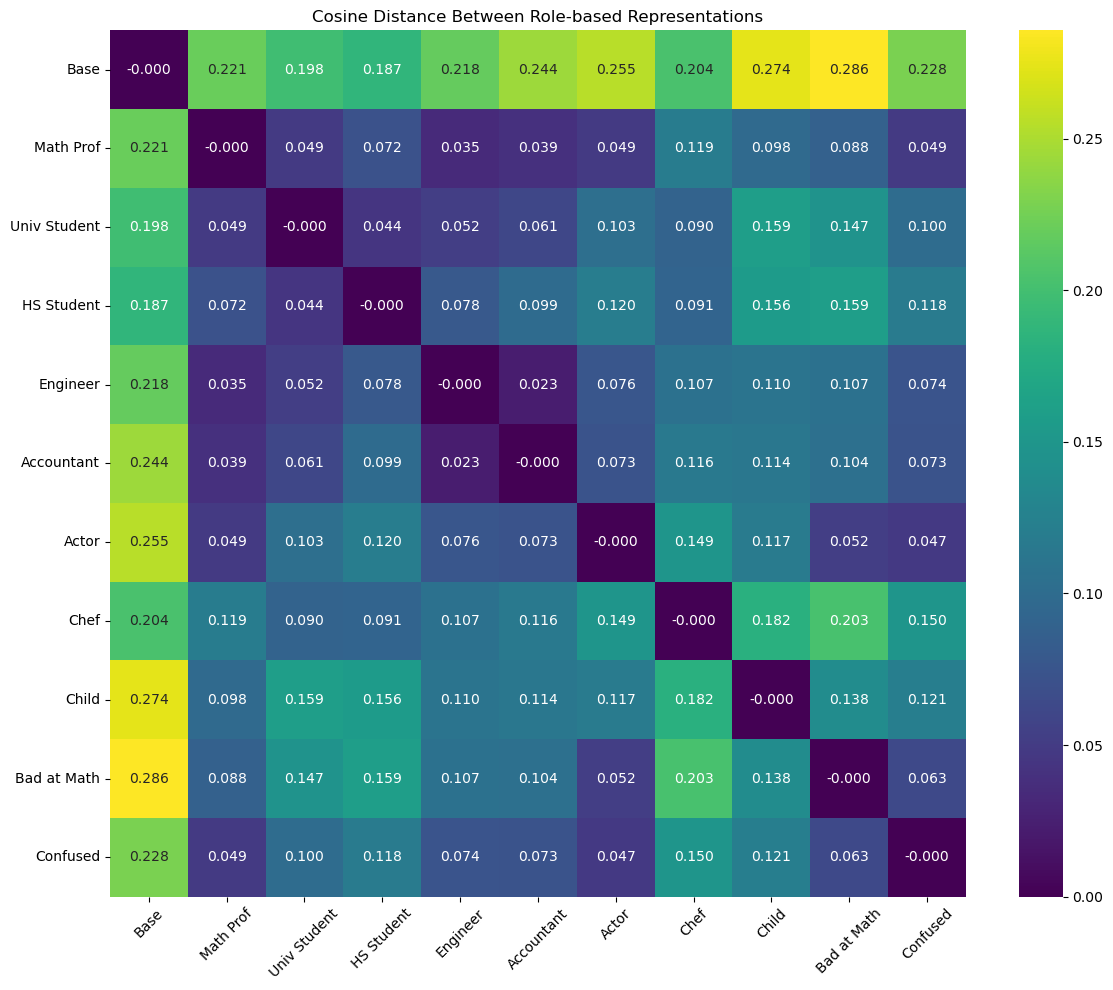


=== 2D REPRESENTATION SPACE ===


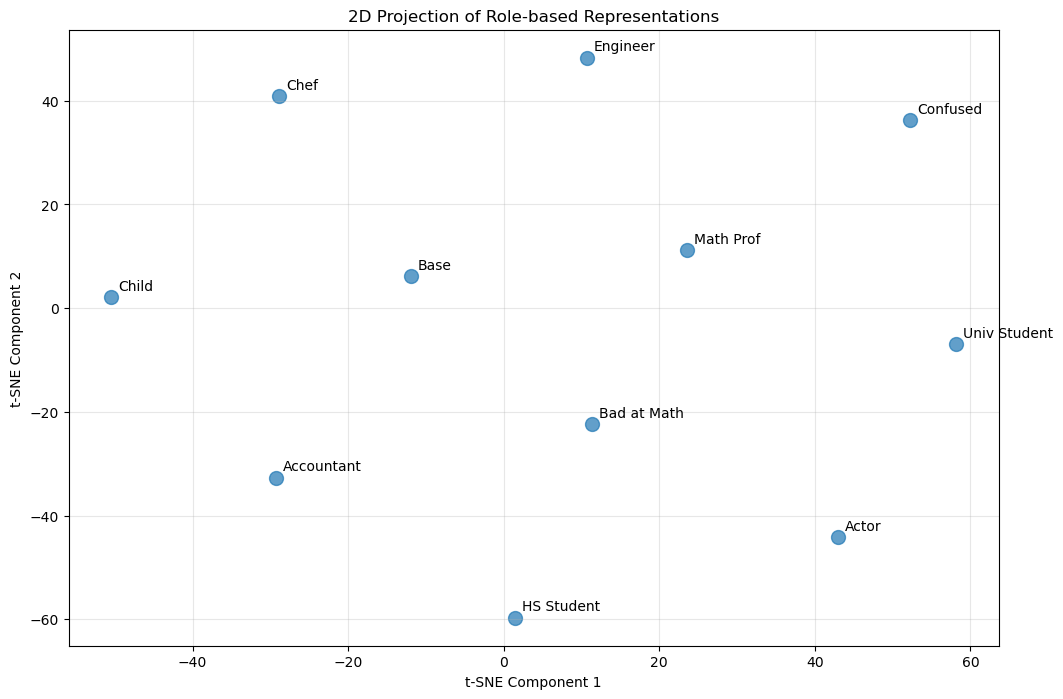


=== DISTANCE FROM BASE REPRESENTATION ===


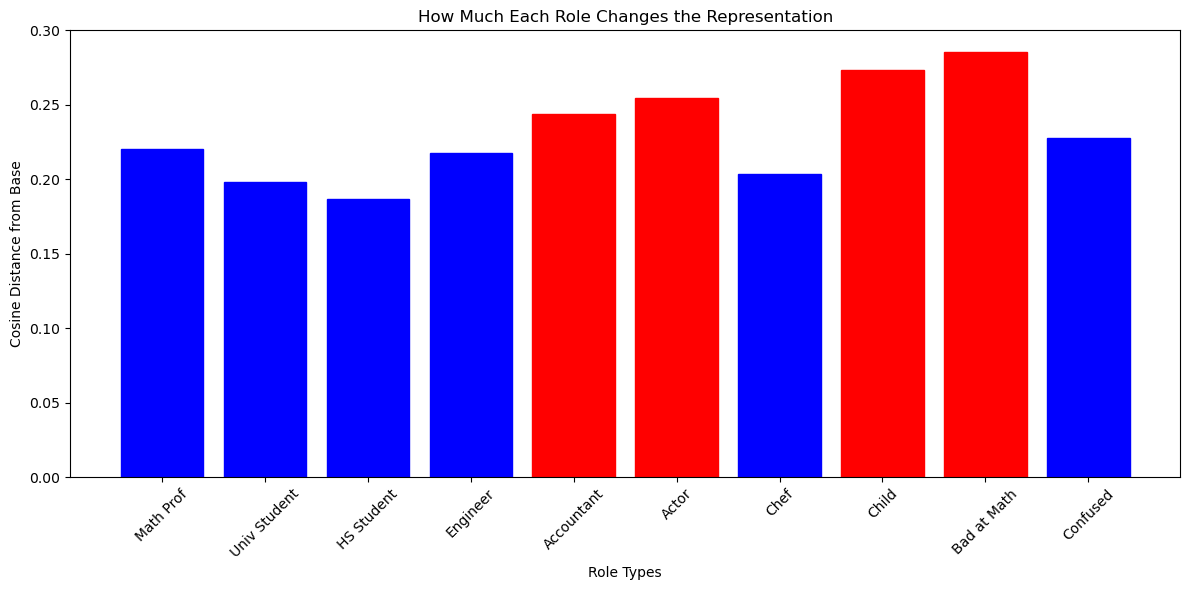

Distance from base representation:
  Math Prof: 0.220553
  Univ Student: 0.198074
  HS Student: 0.187030
  Engineer: 0.217710
  Accountant: 0.243763
  Actor: 0.254694
  Chef: 0.203605
  Child: 0.273558
  Bad at Math: 0.285759
  Confused: 0.228063

=== VOCABULARY EMBEDDING SPACE ANALYSIS ===
Vocabulary size: 128256, Hidden size: 4096

Top 5 nearest vocabulary tokens for each role:

Base:
  1. ' 
' -> similarity: 0.147700
  2. '  
' -> similarity: 0.136595
  3. ' What' -> similarity: 0.114847
  4. ' If' -> similarity: 0.114636
  5. '?
' -> similarity: 0.111485

Math Prof:
  1. ' 
' -> similarity: 0.143184
  2. '  
' -> similarity: 0.134766
  3. ' What' -> similarity: 0.117505
  4. ' If' -> similarity: 0.115622
  5. ' You' -> similarity: 0.115553

Univ Student:
  1. ' 
' -> similarity: 0.139993
  2. '  
' -> similarity: 0.137067
  3. ' If' -> similarity: 0.114764
  4. ' You' -> similarity: 0.110500
  5. ' 

' -> similarity: 0.109407

HS Student:
  1. ' 
' -> similarity: 0.137329
  2. '  


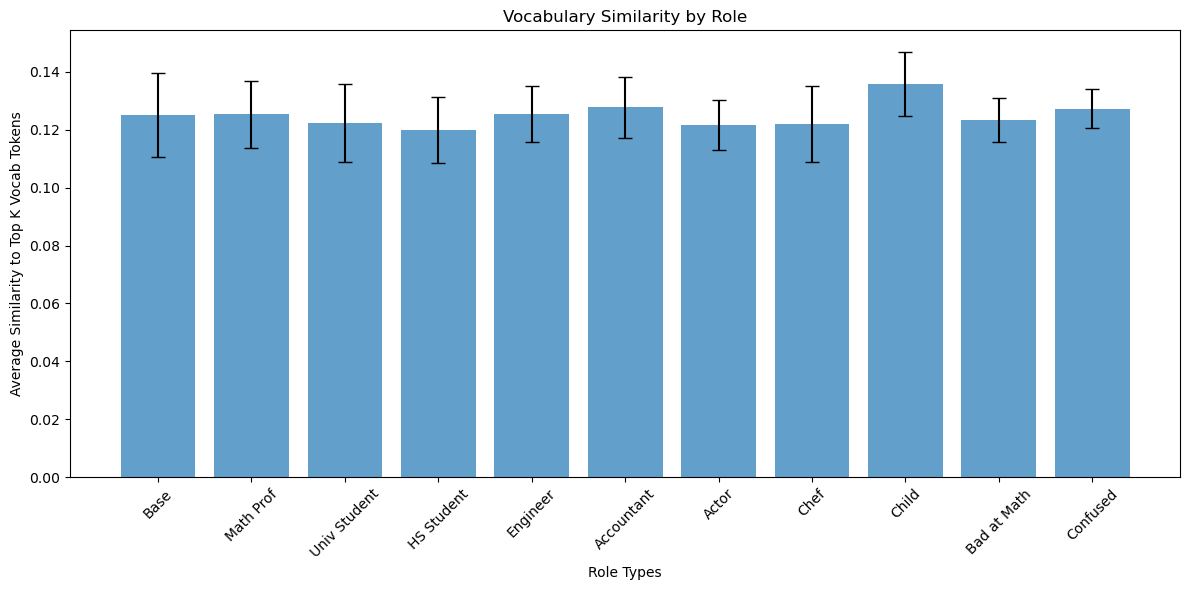


=== L2 (EUCLIDEAN) DISTANCE HEATMAP ===


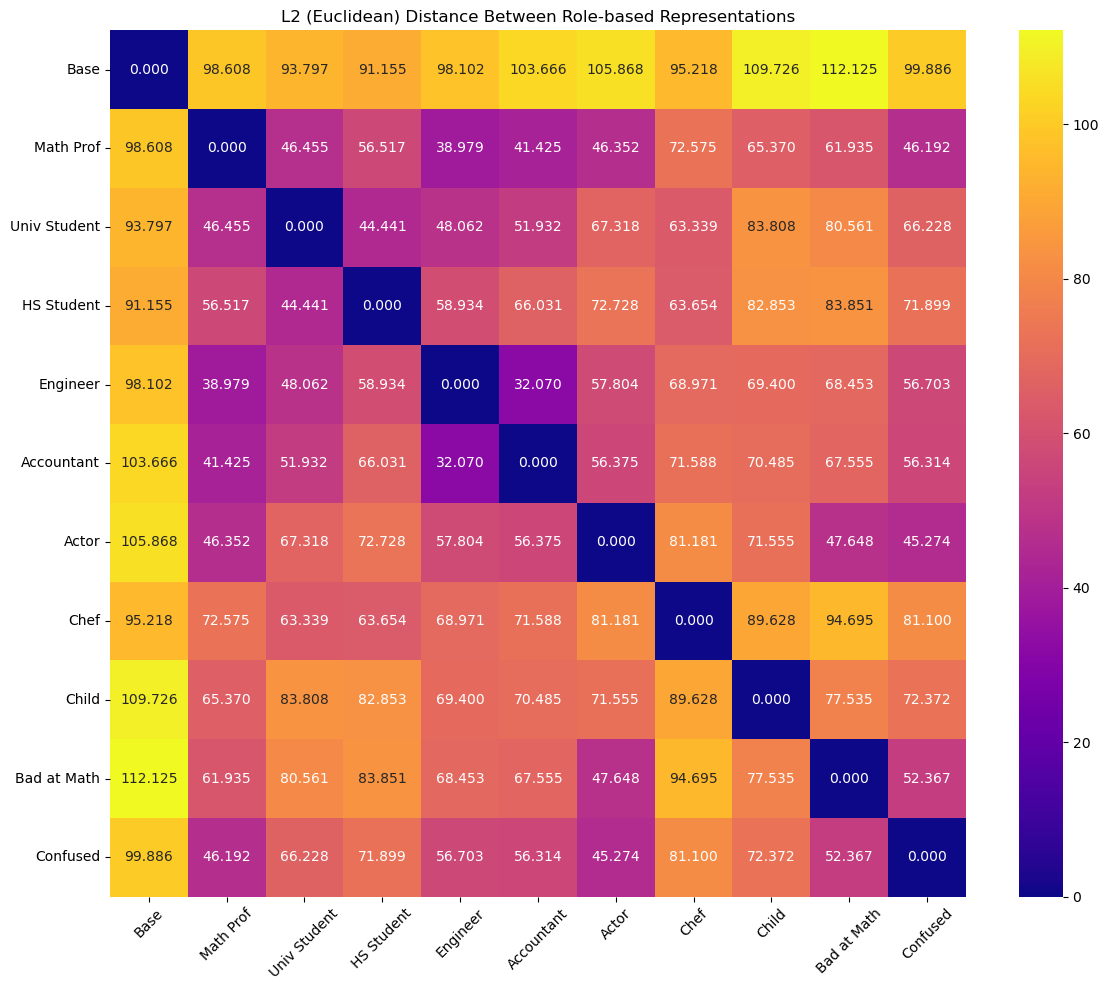

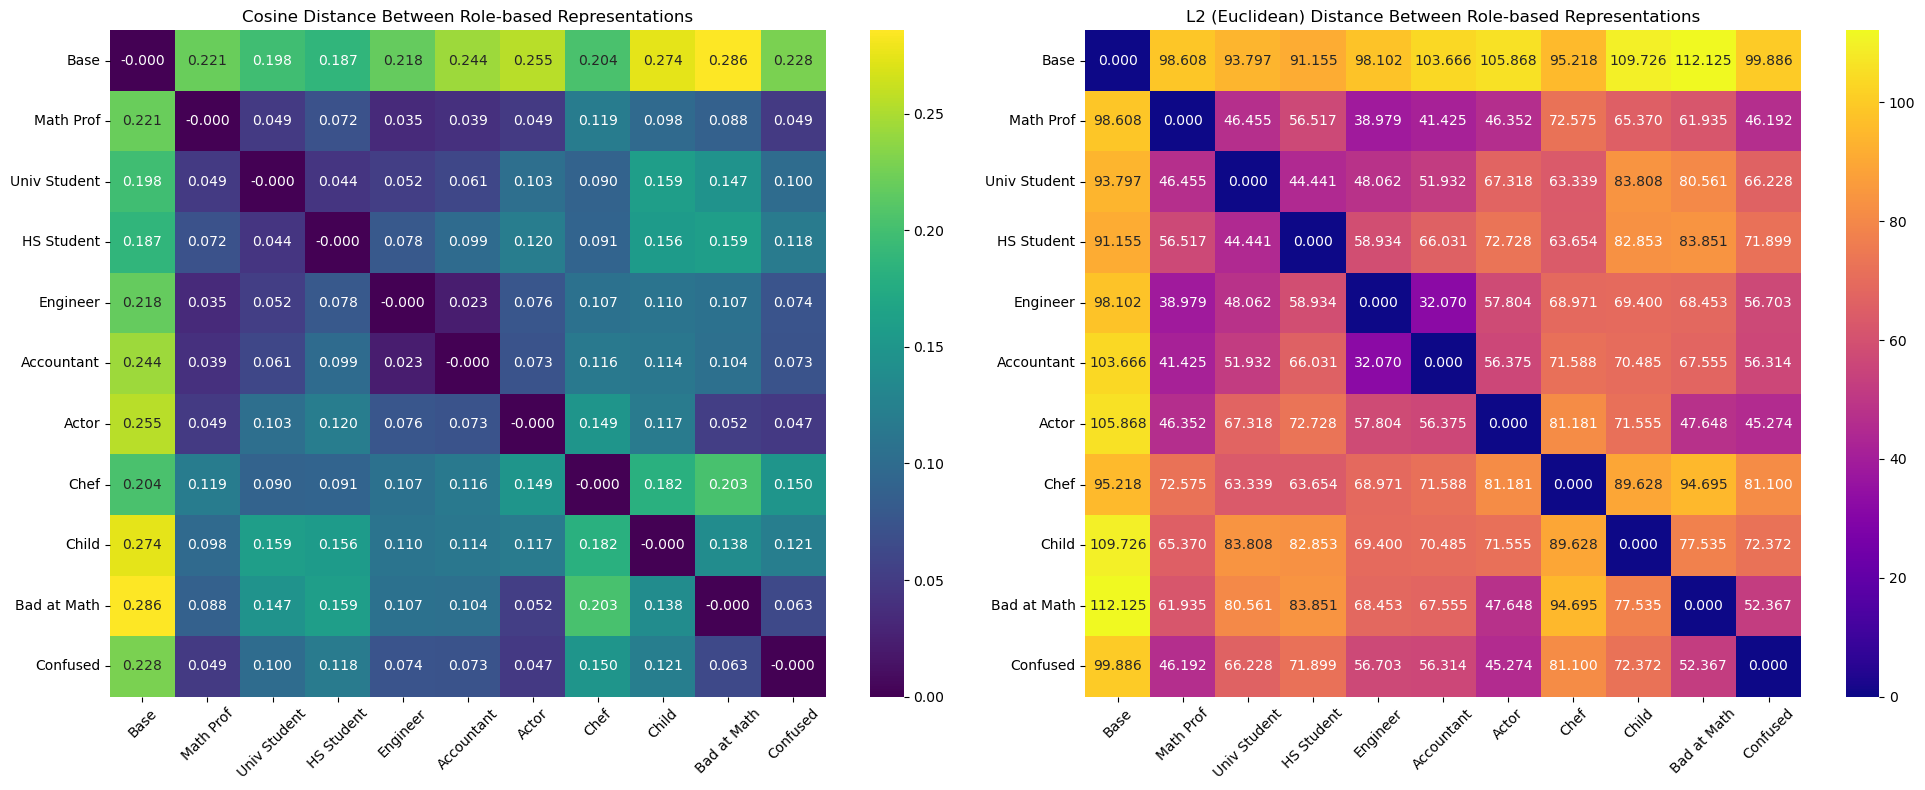


L2 Distance from base representation:
  Math Prof: 98.607971
  Univ Student: 93.797302
  HS Student: 91.154762
  Engineer: 98.101608
  Accountant: 103.666290
  Actor: 105.867699
  Chef: 95.217834
  Child: 109.725899
  Bad at Math: 112.124916
  Confused: 99.886421

=== DISTANCE RANKING COMPARISON ===
Cosine Distance Ranking (closest to farthest from base):
  1. HS Student: 0.187030
  2. Univ Student: 0.198074
  3. Chef: 0.203605
  4. Engineer: 0.217710
  5. Math Prof: 0.220553
  6. Confused: 0.228063
  7. Accountant: 0.243763
  8. Actor: 0.254694
  9. Child: 0.273558
  10. Bad at Math: 0.285759

L2 Distance Ranking (closest to farthest from base):
  1. HS Student: 91.154762
  2. Univ Student: 93.797302
  3. Chef: 95.217834
  4. Engineer: 98.101608
  5. Math Prof: 98.607971
  6. Confused: 99.886421
  7. Accountant: 103.666290
  8. Actor: 105.867699
  9. Child: 109.725899
  10. Bad at Math: 112.124916

=== NORMALIZED L2 DISTANCE ANALYSIS ===
Original representation norms: [148.87941, 148

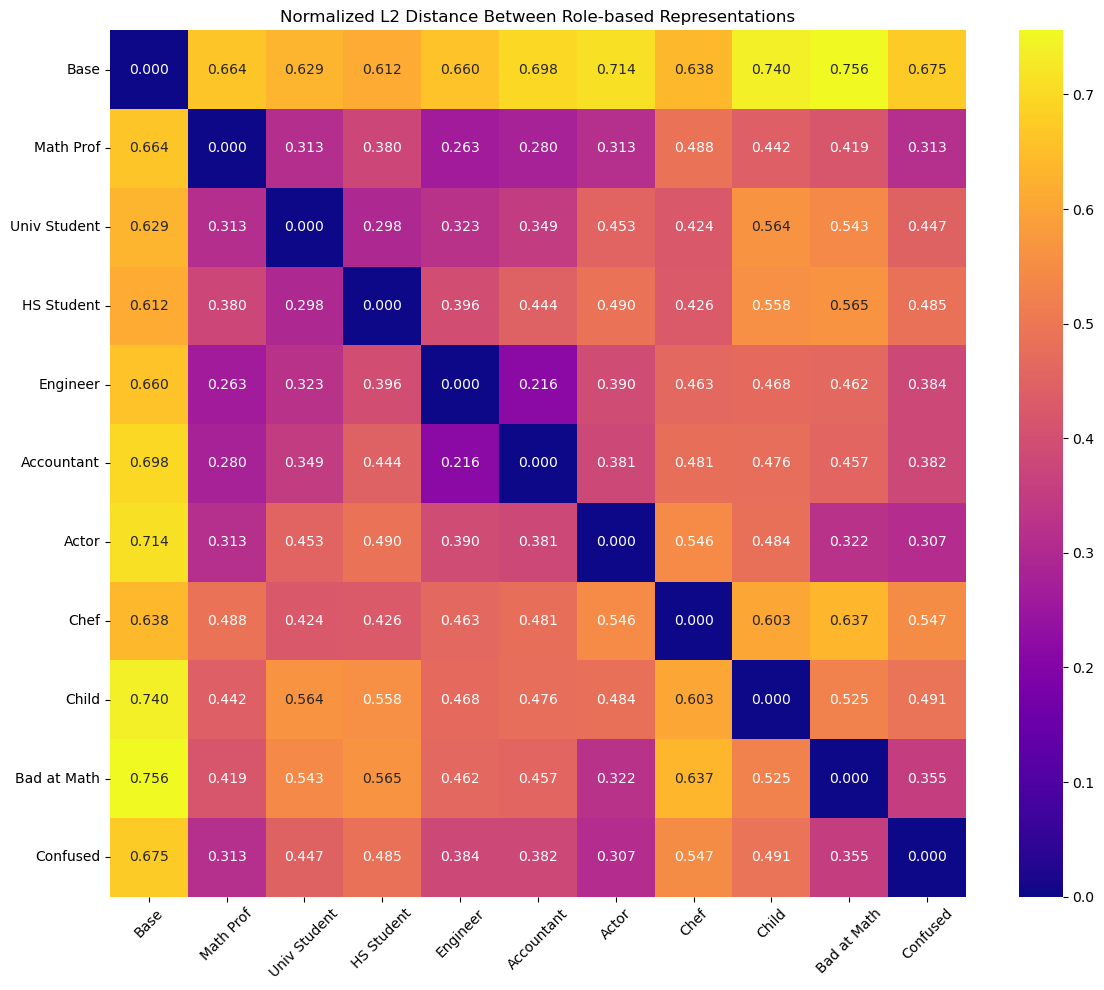

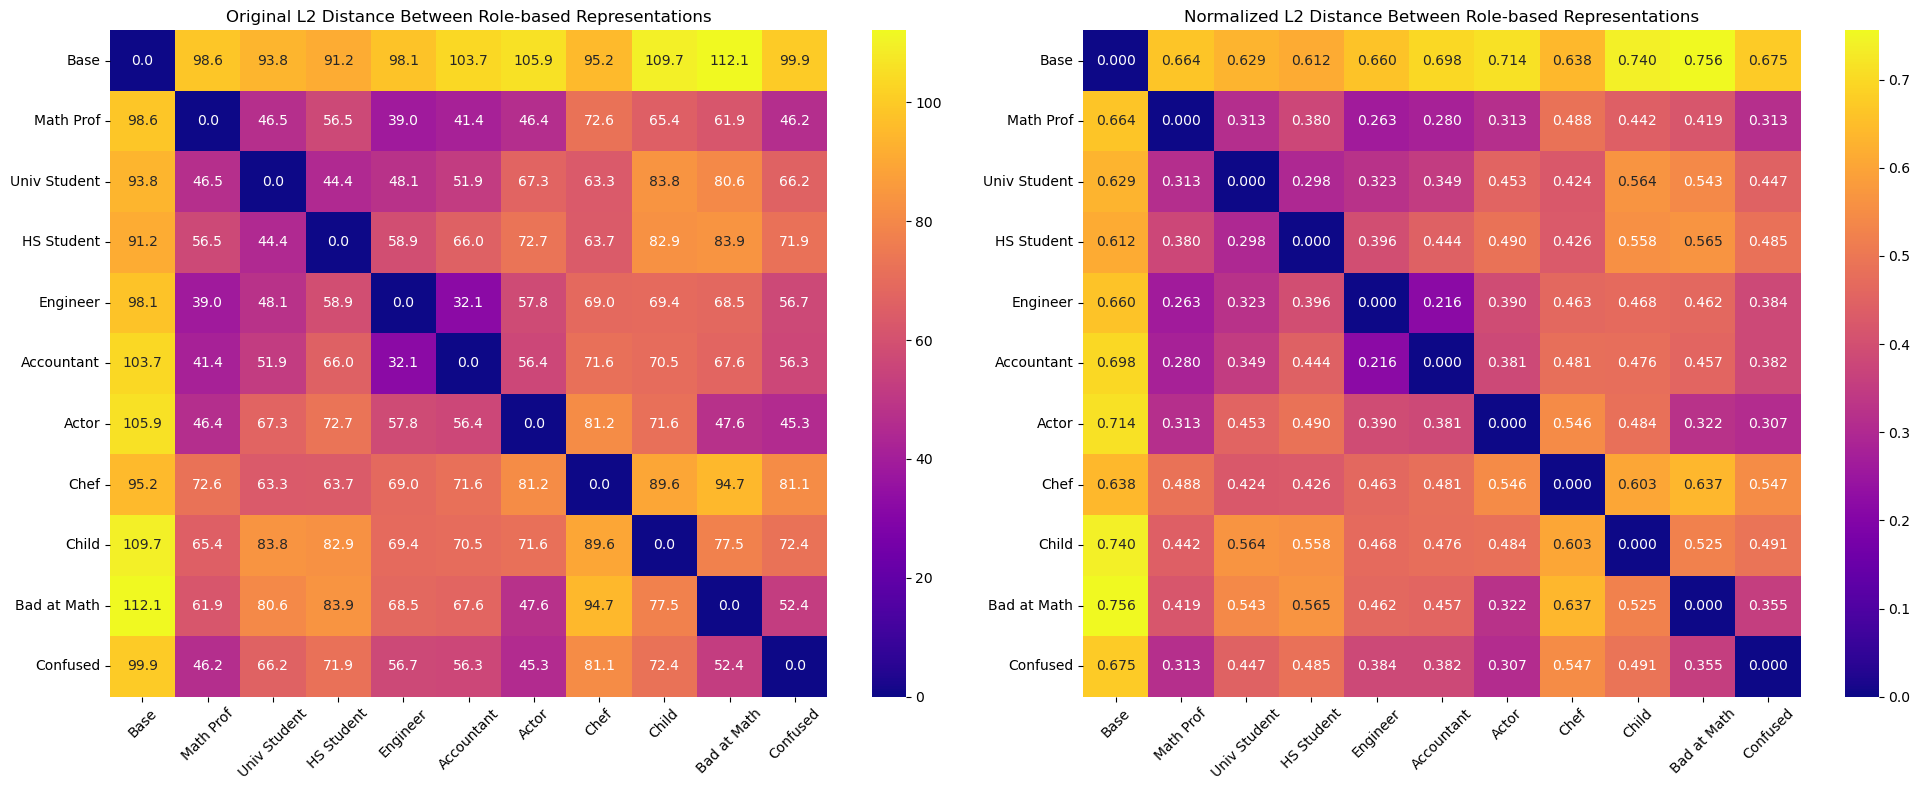


Normalized L2 Distance from base representation:
  Math Prof: 0.664161
  Univ Student: 0.629405
  HS Student: 0.611608
  Engineer: 0.659865
  Accountant: 0.698233
  Actor: 0.713717
  Chef: 0.638133
  Child: 0.739675
  Bad at Math: 0.755991
  Confused: 0.675373

=== RELATIONSHIP BETWEEN NORMALIZED L2 AND COSINE DISTANCE ===
Note: For normalized vectors, L2 distance = sqrt(2 * (1 - cosine_similarity))
Math Prof: Cosine=0.220553, Norm_L2=0.664161, Expected_L2=0.664159
Univ Student: Cosine=0.198074, Norm_L2=0.629405, Expected_L2=0.629403
HS Student: Cosine=0.187030, Norm_L2=0.611608, Expected_L2=0.611605
Engineer: Cosine=0.217710, Norm_L2=0.659865, Expected_L2=0.659863
Accountant: Cosine=0.243763, Norm_L2=0.698233, Expected_L2=0.698231
Actor: Cosine=0.254694, Norm_L2=0.713717, Expected_L2=0.713715
Chef: Cosine=0.203605, Norm_L2=0.638133, Expected_L2=0.638130
Child: Cosine=0.273558, Norm_L2=0.739675, Expected_L2=0.739673
Bad at Math: Cosine=0.285759, Norm_L2=0.755991, Expected_L2=0.755988


In [1]:
# Import utils functions
from utils import load_model, get_final_representation
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load model
MODEL_PATH = "/home/chashi/Desktop/Research/My Projects/models/Llama-3.1-8B-Instruct"
model, tokenizer = load_model(MODEL_PATH)

# Base question
base_question = "What is 12 times 8?"

# Different role prefixes
role_prompts = [
    # Base (no role)
    base_question,
    
    # Academic roles
    f"You are a mathematics professor. {base_question}",
    f"You are a university student studying calculus. {base_question}",
    f"You are a high school student in algebra class. {base_question}",
    
    # Professional roles  
    f"You are an engineer working on calculations. {base_question}",
    f"You are an accountant doing financial calculations. {base_question}",
    
    # Non-mathematical roles
    f"You are a famous actor who never studied math. {base_question}",
    f"You are a chef cooking in a busy restaurant. {base_question}",
    f"You are a 5-year-old child playing with numbers. {base_question}",
    
    # Negative/uncertain roles
    f"You are someone who is terrible at math. {base_question}",
    f"You are confused and don't understand mathematics. {base_question}"
]

role_labels = [
    "Base", "Math Prof", "Univ Student", "HS Student", 
    "Engineer", "Accountant", "Actor", "Chef", "Child", 
    "Bad at Math", "Confused"
]

print(f"Analyzing {len(role_prompts)} role variations...")

# Get representations
representations = []
for i, prompt in enumerate(role_prompts):
    print(f"Processing {i+1}/{len(role_prompts)}: {role_labels[i]}")
    repr_tensor = get_final_representation(model, tokenizer, prompt)
    representations.append(repr_tensor.numpy())

repr_matrix = np.array(representations)
print(f"Representation matrix shape: {repr_matrix.shape}")

# 1. PAIRWISE DISTANCE ANALYSIS
print("\n=== PAIRWISE DISTANCE ANALYSIS ===")
cosine_dist = 1 - cosine_similarity(repr_matrix)
euclidean_dist = euclidean_distances(repr_matrix)

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Cosine Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. 2D VISUALIZATION OF REPRESENTATION SPACE
print("\n=== 2D REPRESENTATION SPACE ===")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(role_prompts)-1))
repr_2d = tsne.fit_transform(repr_matrix)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(repr_2d[:, 0], repr_2d[:, 1], s=100, alpha=0.7)
for i, label in enumerate(role_labels):
    plt.annotate(label, (repr_2d[i, 0], repr_2d[i, 1]), 
                xytext=(5, 5), textcoords='offset points')
plt.title('2D Projection of Role-based Representations')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True, alpha=0.3)
plt.show()

# 3. DISTANCE FROM BASE REPRESENTATION
print("\n=== DISTANCE FROM BASE REPRESENTATION ===")
base_distances = cosine_dist[0, 1:]  # Distance from base to all others
role_names = role_labels[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(role_names)), base_distances)
plt.xlabel('Role Types')
plt.ylabel('Cosine Distance from Base')
plt.title('How Much Each Role Changes the Representation')
plt.xticks(range(len(role_names)), role_names, rotation=45)

# Color bars by distance
for i, bar in enumerate(bars):
    if base_distances[i] > np.mean(base_distances):
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.tight_layout()
plt.show()

# Print numerical results
print("Distance from base representation:")
for name, dist in zip(role_names, base_distances):
    print(f"  {name}: {dist:.6f}")

# 4. VOCABULARY EMBEDDING SPACE ANALYSIS
print("\n=== VOCABULARY EMBEDDING SPACE ANALYSIS ===")

# Get LM head weights (unembedding matrix)
lm_head_weights = model.lm_head.weight.detach().cpu().float().numpy()
vocab_size, hidden_size = lm_head_weights.shape
print(f"Vocabulary size: {vocab_size}, Hidden size: {hidden_size}")

# For each role representation, find nearest vocabulary tokens
k = 5
print(f"\nTop {k} nearest vocabulary tokens for each role:")

nearest_tokens_analysis = []
for i, (repr_vec, label) in enumerate(zip(representations, role_labels)):
    # Calculate cosine similarity with all vocab embeddings
    cosine_sims = np.dot(repr_vec, lm_head_weights.T) / (
        np.linalg.norm(repr_vec) * np.linalg.norm(lm_head_weights, axis=1)
    )
    
    # Get top k nearest tokens
    nearest_indices = np.argsort(cosine_sims)[-k:][::-1]  # Highest similarity first
    nearest_similarities = cosine_sims[nearest_indices]
    nearest_tokens = [tokenizer.decode([idx]) for idx in nearest_indices]
    
    print(f"\n{label}:")
    for j, (token, sim) in enumerate(zip(nearest_tokens, nearest_similarities)):
        print(f"  {j+1}. '{token}' -> similarity: {sim:.6f}")
    
    nearest_tokens_analysis.append({
        'role': label,
        'tokens': nearest_tokens,
        'similarities': nearest_similarities,
        'avg_similarity': np.mean(nearest_similarities),
        'std_similarity': np.std(nearest_similarities)
    })

# 5. SIMILARITY STATISTICS COMPARISON
print(f"\n=== SIMILARITY TO VOCABULARY STATISTICS ===")
avg_sims = [analysis['avg_similarity'] for analysis in nearest_tokens_analysis]
std_sims = [analysis['std_similarity'] for analysis in nearest_tokens_analysis]

plt.figure(figsize=(12, 6))
x = range(len(role_labels))
plt.bar(x, avg_sims, yerr=std_sims, capsize=5, alpha=0.7)
plt.xlabel('Role Types')
plt.ylabel('Average Similarity to Top K Vocab Tokens')
plt.title('Vocabulary Similarity by Role')
plt.xticks(x, role_labels, rotation=45)
plt.tight_layout()
plt.show()

# Add this after your existing pairwise distance analysis section

# Calculate L2 (Euclidean) distances - this is already calculated as euclidean_dist
print("\n=== L2 (EUCLIDEAN) DISTANCE HEATMAP ===")

# L2 distance heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(euclidean_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='plasma', fmt='.3f')
plt.title('L2 (Euclidean) Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: Side-by-side comparison of cosine and L2 distances
plt.figure(figsize=(20, 8))

# Cosine distance heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cosine_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Cosine Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# L2 distance heatmap
plt.subplot(1, 2, 2)
sns.heatmap(euclidean_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='plasma', fmt='.3f')
plt.title('L2 (Euclidean) Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print L2 distance statistics
print("\nL2 Distance from base representation:")
l2_base_distances = euclidean_dist[0, 1:]  # Distance from base to all others
for name, dist in zip(role_names, l2_base_distances):
    print(f"  {name}: {dist:.6f}")

# Compare L2 vs Cosine distance rankings
print("\n=== DISTANCE RANKING COMPARISON ===")
cosine_ranking = sorted(zip(role_names, base_distances), key=lambda x: x[1])
l2_ranking = sorted(zip(role_names, l2_base_distances), key=lambda x: x[1])

print("Cosine Distance Ranking (closest to farthest from base):")
for i, (name, dist) in enumerate(cosine_ranking, 1):
    print(f"  {i}. {name}: {dist:.6f}")

print("\nL2 Distance Ranking (closest to farthest from base):")
for i, (name, dist) in enumerate(l2_ranking, 1):
    print(f"  {i}. {name}: {dist:.6f}")

# Add this after your existing pairwise distance analysis section

# Normalize representations before calculating L2 distances
print("\n=== NORMALIZED L2 DISTANCE ANALYSIS ===")

# L2 normalize each representation vector
normalized_repr_matrix = repr_matrix / np.linalg.norm(repr_matrix, axis=1, keepdims=True)

# Calculate L2 distances on normalized vectors
normalized_euclidean_dist = euclidean_distances(normalized_repr_matrix)

print(f"Original representation norms: {[np.linalg.norm(repr_vec) for repr_vec in repr_matrix]}")
print(f"Normalized representation norms: {[np.linalg.norm(repr_vec) for repr_vec in normalized_repr_matrix]}")

# Normalized L2 distance heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_euclidean_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='plasma', fmt='.3f')
plt.title('Normalized L2 Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Compare original vs normalized L2 distances
plt.figure(figsize=(20, 8))

# Original L2 distance heatmap
plt.subplot(1, 2, 1)
sns.heatmap(euclidean_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='plasma', fmt='.1f')  # Changed format for large numbers
plt.title('Original L2 Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Normalized L2 distance heatmap
plt.subplot(1, 2, 2)
sns.heatmap(normalized_euclidean_dist, 
            xticklabels=role_labels,
            yticklabels=role_labels,
            annot=True, cmap='plasma', fmt='.3f')
plt.title('Normalized L2 Distance Between Role-based Representations')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print normalized L2 distance statistics
print("\nNormalized L2 Distance from base representation:")
normalized_l2_base_distances = normalized_euclidean_dist[0, 1:]
for name, dist in zip(role_names, normalized_l2_base_distances):
    print(f"  {name}: {dist:.6f}")

# Compare normalized L2 vs cosine distances (they should be related now)
print("\n=== RELATIONSHIP BETWEEN NORMALIZED L2 AND COSINE DISTANCE ===")
print("Note: For normalized vectors, L2 distance = sqrt(2 * (1 - cosine_similarity))")

for i, name in enumerate(role_names):
    cos_dist = base_distances[i]
    norm_l2_dist = normalized_l2_base_distances[i]
    expected_l2 = np.sqrt(2 * cos_dist)  # Theoretical relationship
    print(f"{name}: Cosine={cos_dist:.6f}, Norm_L2={norm_l2_dist:.6f}, Expected_L2={expected_l2:.6f}")

# Summary statistics
print(f"\nSummary:")
print(f"Most similar roles to base: {sorted(zip(role_names, base_distances))[:3]}")
print(f"Most different roles from base: {sorted(zip(role_names, base_distances), reverse=True)[:3]}")
print(f"Highest vocab similarity: {max(avg_sims):.6f} ({role_labels[np.argmax(avg_sims)]})")
print(f"Lowest vocab similarity: {min(avg_sims):.6f} ({role_labels[np.argmin(avg_sims)]})")

# Weights tied or not

In [ ]:
# Check if embedding and unembedding weights are tied
def check_weight_tying(model):
    # Get embedding layer weights
    embed_weights = model.model.embed_tokens.weight
    
    # Get LM head weights  
    lm_head_weights = model.lm_head.weight
    
    # Check if they share the same memory (tied)
    is_same_object = embed_weights is lm_head_weights
    
    # Check if they have the same values (even if different objects)
    if not is_same_object:
        is_same_values = torch.equal(embed_weights, lm_head_weights)
    else:
        is_same_values = True
    
    print(f"Embedding shape: {embed_weights.shape}")
    print(f"LM head shape: {lm_head_weights.shape}")
    print(f"Same memory object: {is_same_object}")
    print(f"Same values: {is_same_values}")
    print(f"Weight tying: {'TIED' if is_same_object else 'UNTIED'}")
    
    return is_same_object

# Run the check
check_weight_tying(model)

# Embedding vs Unembedding 